## Web Scraping Mobile phone details from Flipkart
- will scrape all the data available on Mobile phones in Flipkartm using BeautifulSoup library
- convert the unstructured data into structured form and create a Dataframe
- clean the dataframe from missing values and outliers
- analyze the dataset and review the data through visualizations

### Importing all the necessary libraries

In [2]:
import requests
from fake_useragent import UserAgent
import pandas as pd
import bs4   # importing BeautifulSoup4 library
from bs4 import BeautifulSoup as bs

## Part 1 : Scraping the data from the website

### Will create empty lists to store the unstructured data in a structured form

In [41]:
products=[]   # list to store names of the products
prices=[]   # list to store prices of the products
ratings=[]   # list to store ratings of the products
specifications=[]   # list to select all the specifications of the products
discounts=[]   # list to select all discounts of the products
df=pd.DataFrame()

In [42]:
# creating a user-agent
user_agent=UserAgent()

In [43]:
# taking the product name as an input
product_name=input('Product Name- ')

Product Name- Mobile


### To extract from multiple pages in Flipkart will use a for loop

In [46]:
for i in range (1,4):
    url="https://www.flipkart.com/search?q={0}&page={1}"
    url=url.format(product_name,i)
    
    # getting response from the page using get method of requests module
    page = requests.get(url, headers={"user-agent": user_agent.chrome})
    
    # storing the content of the page in a variable
    html = page.content
    
    # creating BeautifulSoup object
    page_soup = bs4.BeautifulSoup(html, "html.parser")
    
    for containers in page_soup.findAll('div',{'class':'_4ddWXP'}):
        name=containers.find('a', attrs={'class':'s1Q9rs'})
        price=containers.find('div', attrs={'class':'_30jeq3'})
        rating=containers.find('div', attrs={'class':'_3LWZ1K'})
        specification=containers.find('div', attrs={'class':'_3Djpdu'})
        discount=containers.find('div', attrs={'class':'_3Ay6Sb'})
                
        products.append(name.text)
        prices.append(price.text)
        specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN')
        discounts.append(discount.text) if type(discount) == bs4.element.Tag else discounts.append('NaN')
                
    df = pd.DataFrame({'Product Name':products,'Price':prices, 'Specification':specifications, 'Rating':ratings, 'Discount':discounts})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   240 non-null    object
 1   Price          240 non-null    object
 2   Specification  240 non-null    object
 3   Rating         240 non-null    object
 4   Discount       240 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


### We have scraped data for 240 mobile phones from Flipkart (which appear in first three pages)

In [48]:
df.head()

,Product Name,Price,Specification,Rating,Discount
0,"POCO C3 (Matte Black, 64 GB)","₹8,499",4 GB RAM,NaN,22% off
1,"POCO C3 (Arctic Blue, 64 GB)","₹8,499",4 GB RAM,NaN,22% off
2,"realme C15 Qualcomm Edition (Power Blue, 64 GB)","₹10,999",4 GB RAM,NaN,15% off
3,"realme C15 Qualcomm Edition (Power Silver, 64 GB)","₹10,999",4 GB RAM,NaN,15% off
4,"POCO C3 (Arctic Blue, 32 GB)","₹7,499",3 GB RAM,NaN,25% off


## Part 2 : Cleaning the dataset

In [49]:
# looking at the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   240 non-null    object
 1   Price          240 non-null    object
 2   Specification  240 non-null    object
 3   Rating         240 non-null    object
 4   Discount       240 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


In [50]:
df.isnull().sum()

Product Name     0
Price            0
Specification    0
Rating           0
Discount         0
dtype: int64

### Inference
- There are no null values in the dataset
- Since the dataset is from a consumer facing website like Flipkart, there is not likely to be any outlier by mistake 
- However, two numerical column Price is shown as categorical object, which needs to be changed to integer variables

In [51]:
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',':''}, regex=True)
df.head()

,Product Name,Price,Specification,Rating,Discount
0,"POCO C3 (Matte Black, 64 GB)",8499,4 GB RAM,NaN,22% off
1,"POCO C3 (Arctic Blue, 64 GB)",8499,4 GB RAM,NaN,22% off
2,"realme C15 Qualcomm Edition (Power Blue, 64 GB)",10999,4 GB RAM,NaN,15% off
3,"realme C15 Qualcomm Edition (Power Silver, 64 GB)",10999,4 GB RAM,NaN,15% off
4,"POCO C3 (Arctic Blue, 32 GB)",7499,3 GB RAM,NaN,25% off


In [52]:
# Saving the dataset in a csv file
df.to_csv('Flipkart mobile_20th March.csv')
df.to_html('Flipkart mobile.html')

## Part 3: Visualizing and Analyzing the Dataset

In [5]:
df1=pd.read_csv('Flipkart mobile_20th March.csv')

In [6]:
# importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

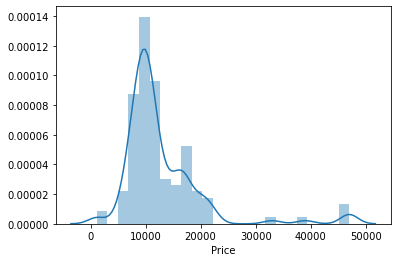

In [7]:
# looking at the price histogram
sns.distplot(df1['Price'])
plt.show()


In [8]:
df1.describe()

,Unnamed: 0,Price,Rating
count,240.00000,240.000000,0.0
mean,119.50000,12780.816667,NaN
std,69.42622,7563.267297,NaN
min,0.00000,1147.000000,NaN
25%,59.75000,8990.000000,NaN
50%,119.50000,10999.000000,NaN
75%,179.25000,14999.000000,NaN
max,239.00000,46999.000000,NaN


### Price Range
- the lowest priced mobile available is at Rs.1147
- the most expensive mobile phone is at Rs.46999
- half of the mobiles are available within a price range of Rs.8990 and 14999

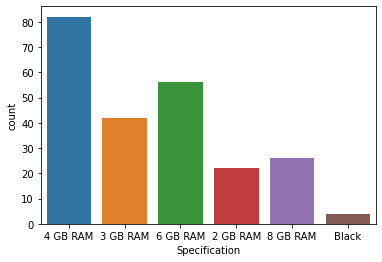

In [9]:
# looking at the Specifications
sns.countplot(x='Specification', data=df1)
plt.show()

### Specifications
- most of the mobile phones are of 4 GB RAM, followed by 6 GB RAM
- not many mobiles are available at 2 GB RAM

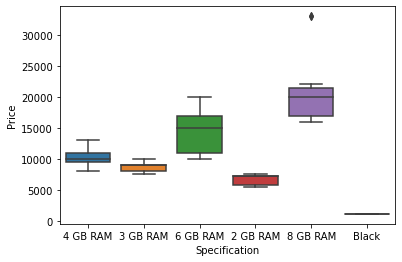

In [10]:
# Price and Specification
sns.boxplot(x='Specification', y='Price', data=df1)
plt.show()

In [11]:
# finding the outlier in terms of price
df1.loc[df1['Price']>40000]

,Unnamed: 0,Product Name,Price,Specification,Rating,Discount
31,31,"APPLE iPhone 11 (White, 64 GB)",46999,NaN,NaN,14% off
38,38,"APPLE iPhone 11 (Black, 64 GB)",46999,NaN,NaN,14% off
61,61,"APPLE iPhone 11 (Purple, 64 GB)",46999,NaN,NaN,14% off
150,150,"APPLE iPhone 11 (White, 64 GB)",46999,NaN,NaN,14% off
161,161,"APPLE iPhone 11 (Black, 64 GB)",46999,NaN,NaN,14% off
181,181,"APPLE iPhone 11 (Purple, 64 GB)",46999,NaN,NaN,14% off


In [12]:
# finding the lower price mobiles
df1.loc[df1['Specification']=='2 GB RAM'].sort_values('Price', ascending=True)

,Unnamed: 0,Product Name,Price,Specification,Rating,Discount
44,44,"GIONEE Max (Royal Blue, 32 GB)",5499,2 GB RAM,NaN,31% off
45,45,"GIONEE Max (Red, 32 GB)",5499,2 GB RAM,NaN,31% off
180,180,"GIONEE Max (Black, 32 GB)",5499,2 GB RAM,NaN,31% off
60,60,"GIONEE Max (Black, 32 GB)",5499,2 GB RAM,NaN,31% off
166,166,"GIONEE Max (Red, 32 GB)",5499,2 GB RAM,NaN,31% off
165,165,"GIONEE Max (Royal Blue, 32 GB)",5499,2 GB RAM,NaN,31% off
182,182,"Infinix Smart HD 2021 (Quartz Green, 32 GB)",6499,2 GB RAM,NaN,18% off
62,62,"Infinix Smart HD 2021 (Quartz Green, 32 GB)",6499,2 GB RAM,NaN,18% off
63,63,"Infinix Smart HD 2021 (Topaz Blue, 32 GB)",6499,2 GB RAM,NaN,18% off
184,184,"Infinix Smart HD 2021 (Topaz Blue, 32 GB)",6499,2 GB RAM,NaN,18% off


### Specification and Price
- As expected, a higher GB RAM would be higher priced
- 8 GB RAM would be priced around Rs.20000, with one outlier at Rs.46999 for iPhone 11
- If anyone wants to buy a low priced 2 GB RAM phone, the lowest options available is GIONEE max at Rs.5499, Infinix at Rs.6499, realme at Rs.7499
- If anyone wants a 4 GB RAM phone, there are more options available (around 80) within a very narrow price range (all are similar priced)
- 6 GB and 8 GB RAM specifications are available across a much wider price range
- this shows that the lower specification phones have competitive prices and brands cannot afford to price them differently, as there is not much differentiation otherwise
- but higher specification phones (6 GB and 8 GB RAM) do not compete on only price and they would have other differentiating factors. Hence, brands can afford to price them differently. 

In [13]:
# adding another column in the dataset to show the brand using apply()
def get_brand(prod_name):
    return prod_name.split(' ')[0]

df1['Brand']=df1['Product Name'].apply(lambda x: get_brand(x))
df1.head()


,Unnamed: 0,Product Name,Price,Specification,Rating,Discount,Brand
0,0,"POCO C3 (Matte Black, 64 GB)",8499,4 GB RAM,NaN,22% off,POCO
1,1,"POCO C3 (Arctic Blue, 64 GB)",8499,4 GB RAM,NaN,22% off,POCO
2,2,"realme C15 Qualcomm Edition (Power Blue, 64 GB)",10999,4 GB RAM,NaN,15% off,realme
3,3,"realme C15 Qualcomm Edition (Power Silver, 64 GB)",10999,4 GB RAM,NaN,15% off,realme
4,4,"POCO C3 (Arctic Blue, 32 GB)",7499,3 GB RAM,NaN,25% off,POCO


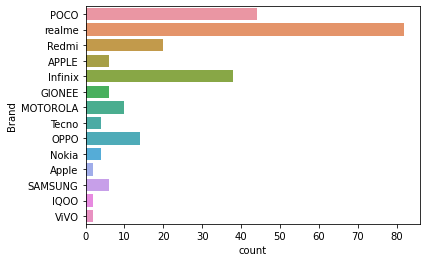

In [14]:
# checking brand wise product count
sns.countplot(y='Brand', data=df1)
plt.show()


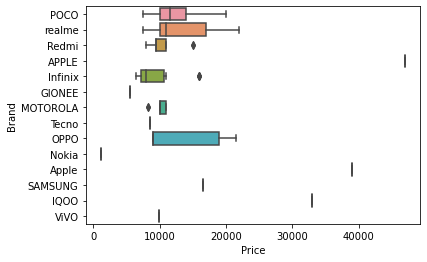

In [15]:
# checking brand wise price and specifications
sns.boxplot(y='Brand', x='Price', data=df1)
plt.show()

In [16]:
df1.groupby(['Brand'])['Price'].mean()

Brand
APPLE       46999.000000
Apple       38999.000000
GIONEE       5499.000000
IQOO        32990.000000
Infinix      9304.263158
MOTOROLA    10059.000000
Nokia        1148.500000
OPPO        12918.571429
POCO        12476.272727
Redmi       10199.000000
SAMSUNG     16499.000000
Tecno        8499.000000
ViVO         9990.000000
realme      12962.414634
Name: Price, dtype: float64

In [17]:
df1.loc[df1['Brand']=='Nokia']

,Unnamed: 0,Product Name,Price,Specification,Rating,Discount,Brand
95,95,Nokia TA-1010/105,1150,Black,NaN,NaN,Nokia
109,109,Nokia 105 SS 2020,1147,Black,NaN,NaN,Nokia
215,215,Nokia TA-1010/105,1150,Black,NaN,NaN,Nokia
229,229,Nokia 105 SS 2020,1147,Black,NaN,NaN,Nokia


### Brands
- Out of all the 240 products, one-third of them is from realme, followed by POCO and Infinix
- Apple phones available at two price points Rs.38999 and 46999 (highest priced among all other brands)
- IQOO is also a higher priced brand at Rs.32990
- OPPO, POCO, realme all compete with each other at Rs.12000 to 13000 price range
- Redmi and ViVO compete with each other at Rs.10000 price points
- GIONEE is the lowest smart phone available at Rs.5499
- Nokia phone available at Rs.1148, but in all probablity it would be a feature phone, since it doesn't show any specifications

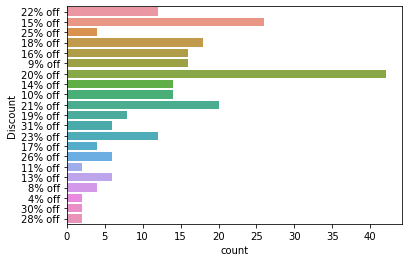

In [21]:
# checking discounts
sns.countplot(y='Discount', data=df1)
plt.show()

In [22]:
df2=pd.read_csv('discount range.csv')
df2.head()

,Product Name,Price,Specification,Discount Range
0,"POCO C3 (Matte Black, 64 GB)",8499,4 GB RAM,21% to 25% off
1,"POCO C3 (Arctic Blue, 64 GB)",8499,4 GB RAM,21% to 25% off
2,"realme C15 Qualcomm Edition (Power Blue, 64 GB)",10999,4 GB RAM,10% to 15% off
3,"realme C15 Qualcomm Edition (Power Silver, 64 GB)",10999,4 GB RAM,10% to 15% off
4,"POCO C3 (Arctic Blue, 32 GB)",7499,3 GB RAM,21% to 25% off


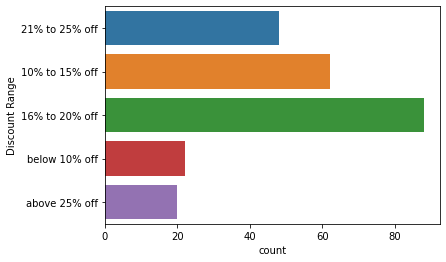

In [26]:
sns.countplot(y='Discount Range', data=df2)
plt.show()

In [27]:
def get_brand(prod_name):
    return prod_name.split(' ')[0]

df2['Brand']=df2['Product Name'].apply(lambda x: get_brand(x))

In [40]:
df2.groupby(['Brand', 'Discount Range']).count()

Product Name  Price  Specification
Brand    Discount Range                                    
APPLE    10% to 15% off             6      6              0
Apple    16% to 20% off             2      2              0
GIONEE   above 25% off              6      6              6
IQOO     16% to 20% off             2      2              2
Infinix  10% to 15% off             4      4              4
         16% to 20% off            28     28             28
         21% to 25% off             6      6              6
MOTOROLA 21% to 25% off             4      4              4
         above 25% off              6      6              6
Nokia    above 25% off              4      4              4
OPPO     10% to 15% off             4      4              4
         16% to 20% off             8      8              8
         below 10% off              2      2              2
POCO     10% to 15% off            16     16             16
         16% to 20% off             2      2              2
         21% to 25% off            24     24             24
         above 25% off              2      2              2
Redmi    16% to 20% off            12     12             12
         21% to 25% off             8      8              8
SAMSUNG  21% to 25% off             6      6              6
Tecno    10% to 15% off             4      4              4
ViVO     above 25% off              2      2              2
realme   10% to 15% off            28     28             28
         16% to 20% off            34     34             34
         below 10% off             20     20             20

In [41]:
df3=df2.loc[df2['Discount Range']=='below 10% off']
df4=df2.loc[df2['Discount Range']=='10% to 15% off']
df5=df2.loc[df2['Discount Range']=='16% to 20% off']
df6=df2.loc[df2['Discount Range']=='21% to 25% off']
df7=df2.loc[df2['Discount Range']=='above 25% off']

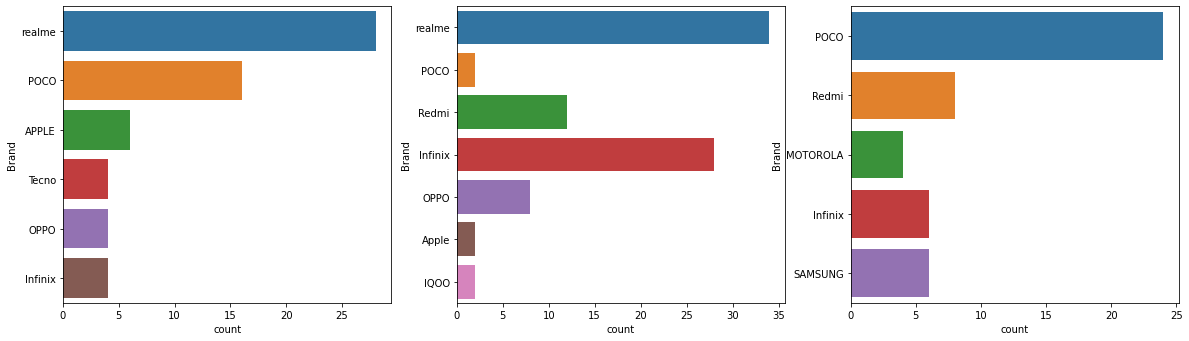

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(y='Brand', data = df4)
plt.subplot(2,3,2)
sns.countplot(y='Brand', data = df5)
plt.subplot(2,3,3)
sns.countplot(y='Brand', data = df6)
plt.show()

In [19]:
df2=df1.loc[df1['Discount']=='20% off']
df2.groupby(['Brand']).count()

,Unnamed: 0,Product Name,Price,Specification,Rating,Discount
Brand,,,,,,
Infinix,24,24,24,24,0,24
POCO,2,2,2,2,0,2
Redmi,12,12,12,12,0,12
realme,4,4,4,4,0,4


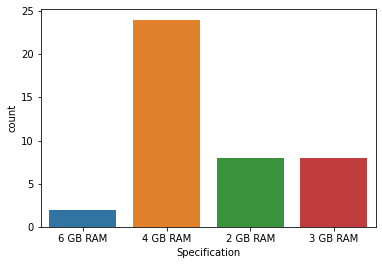

In [20]:
# checking discounts
sns.countplot(x='Specification', data=df2)
plt.show()

### Discounts
- 42 phones are available at 20% off
- 24 of these phones are from Infinix, 12 from Redmi
- most of the 4 GB RAM variants are available at 20% discount